In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E Commerce Dataset.xlsx to E Commerce Dataset.xlsx


In [2]:
df = pd.read_excel(r'C:\Users\nirwo\Downloads\archive\E Commerce Dataset.xlsx', sheet_name='E Comm')

## 1. Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
df.duplicated().sum()

0

A.  Semua tipe data sudah sesuai

B.  Ada, Tenure, Warehouse To Home, HourSpend On App, Order Amount Hike From last Year, Coupon Used, Order Count, Day Since Last Order

C. Semua nilai summary sudah sesuai



## 2. Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

In [8]:
# pengelompokan kolom berdasarkan jenisnya

cats = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
nums = ['CustomerID','Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress',
        'Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

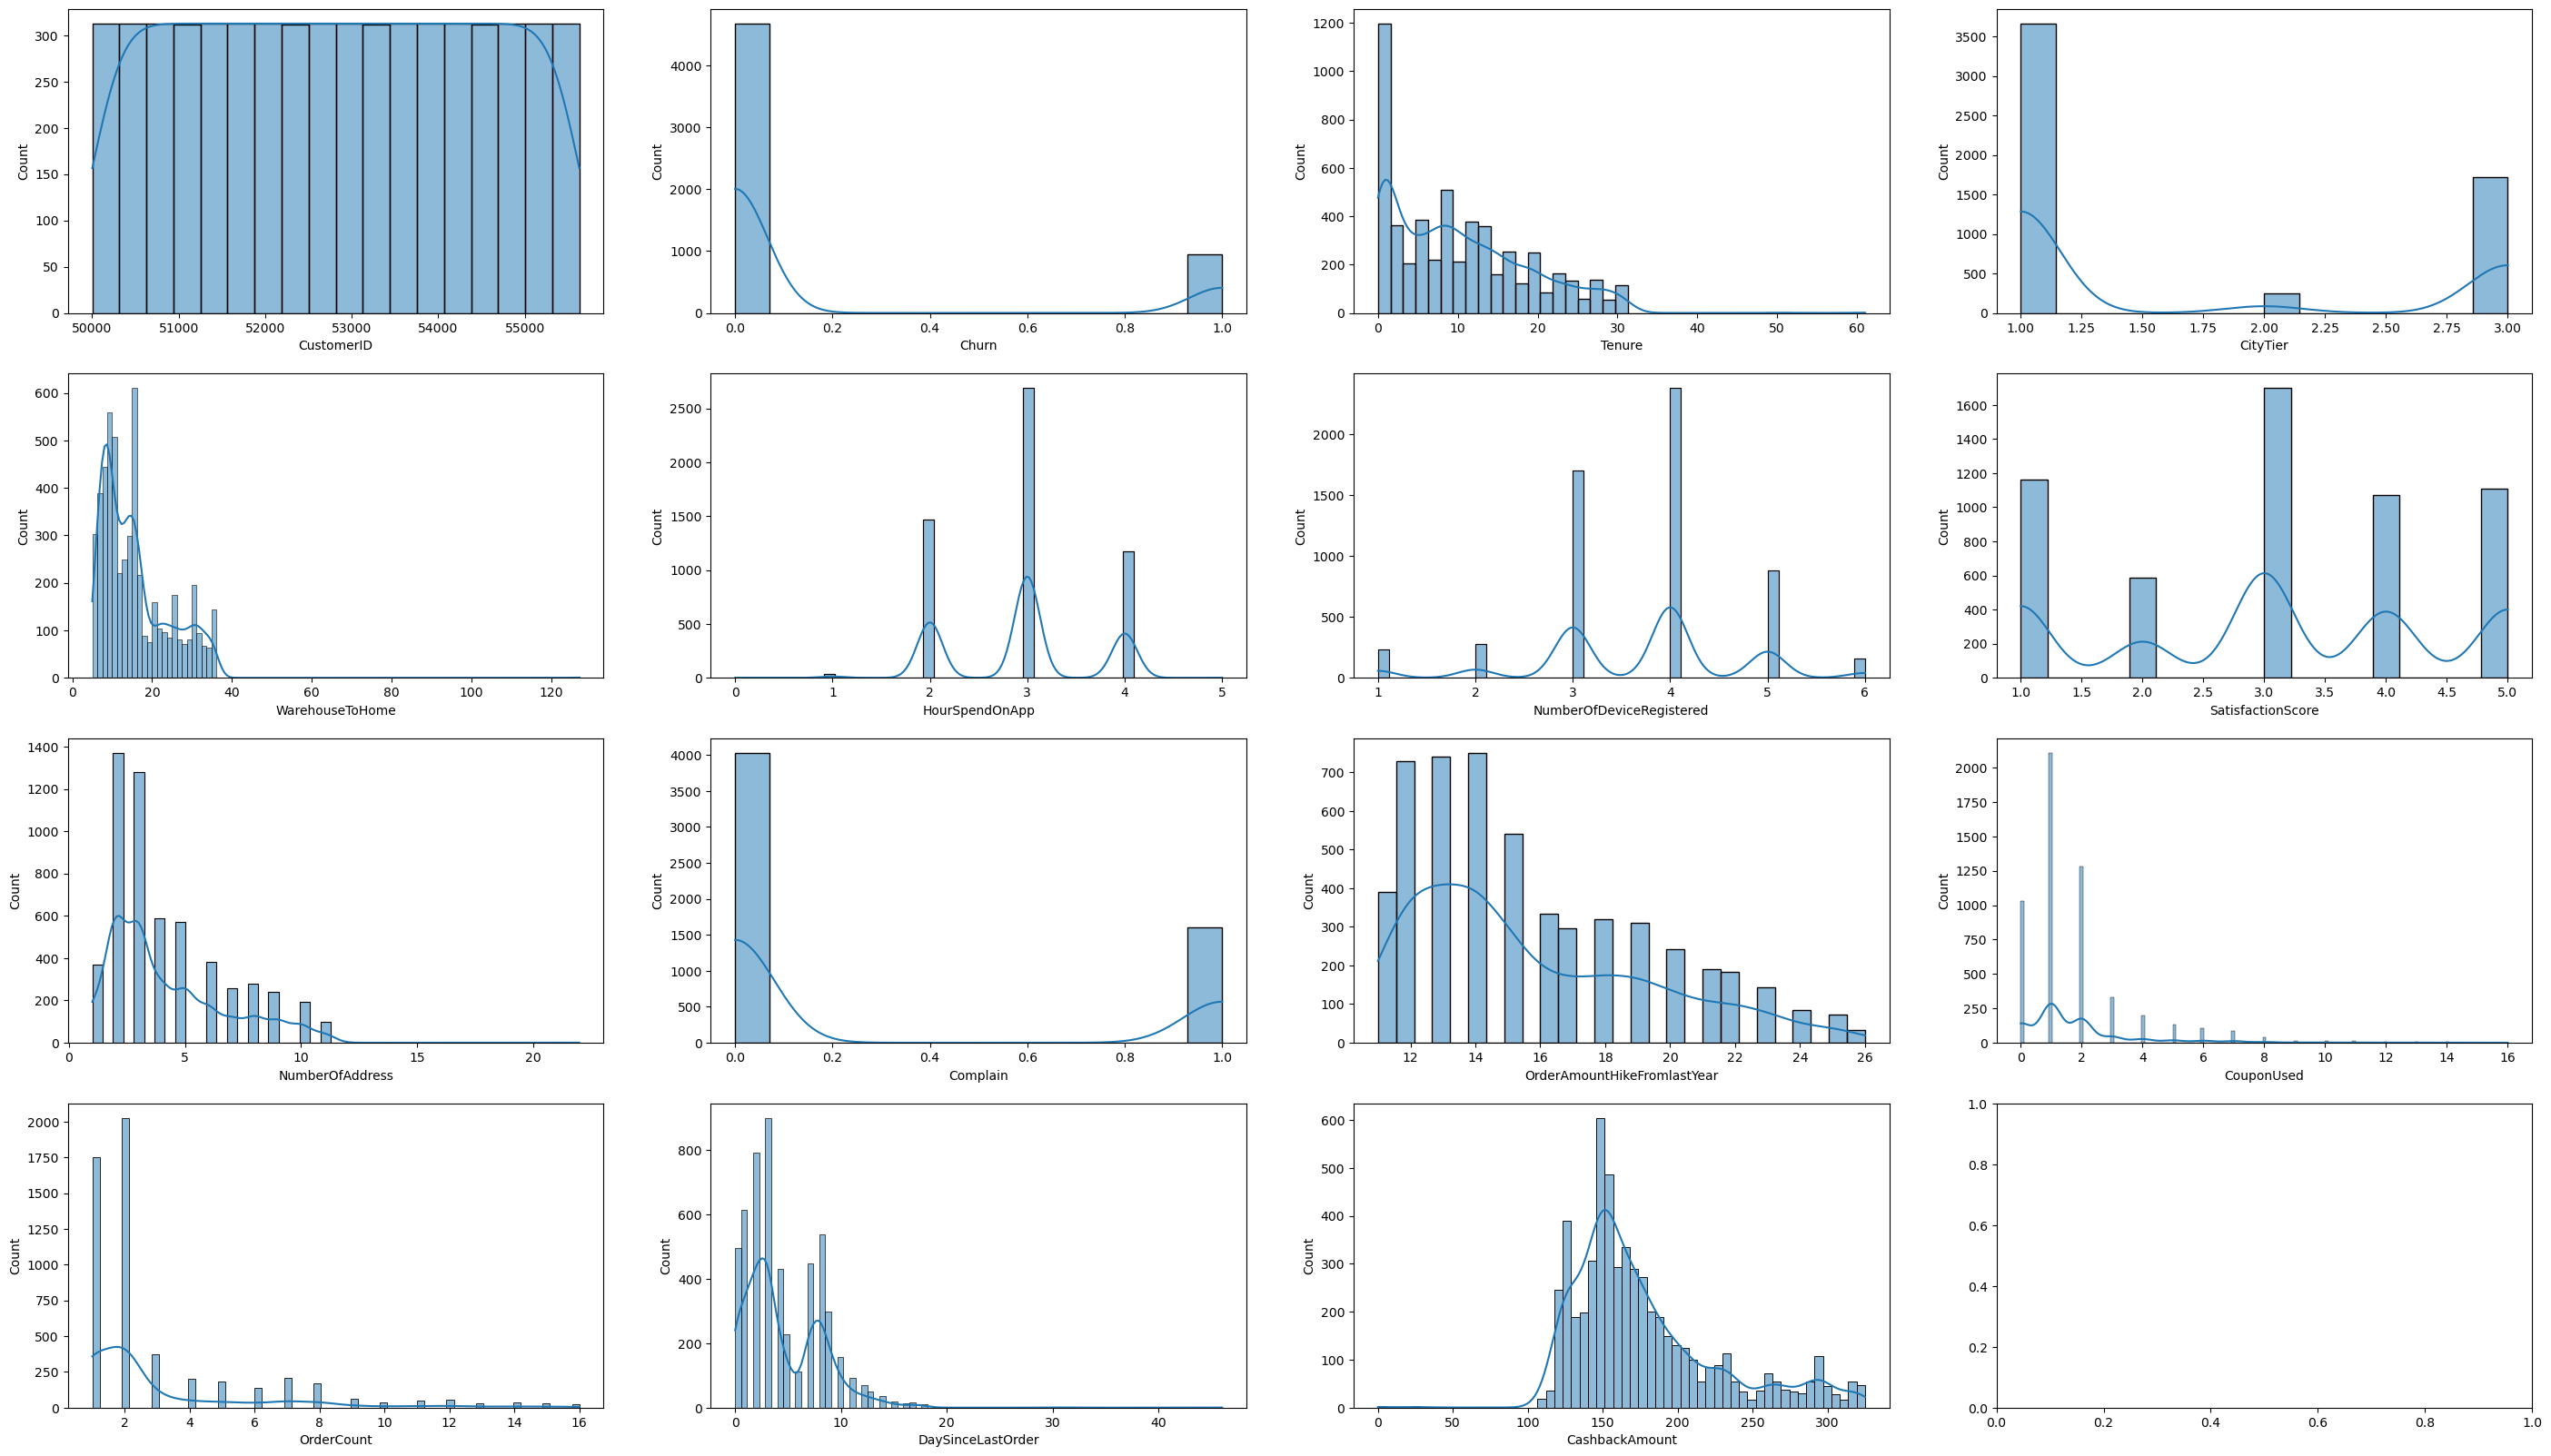

In [21]:
fig, ax = plt.subplots(4, 4, figsize=(35, 20))
for i, subplot in zip(nums, ax.flatten()):
    sns.histplot(df[i], kde = True, ax=subplot)

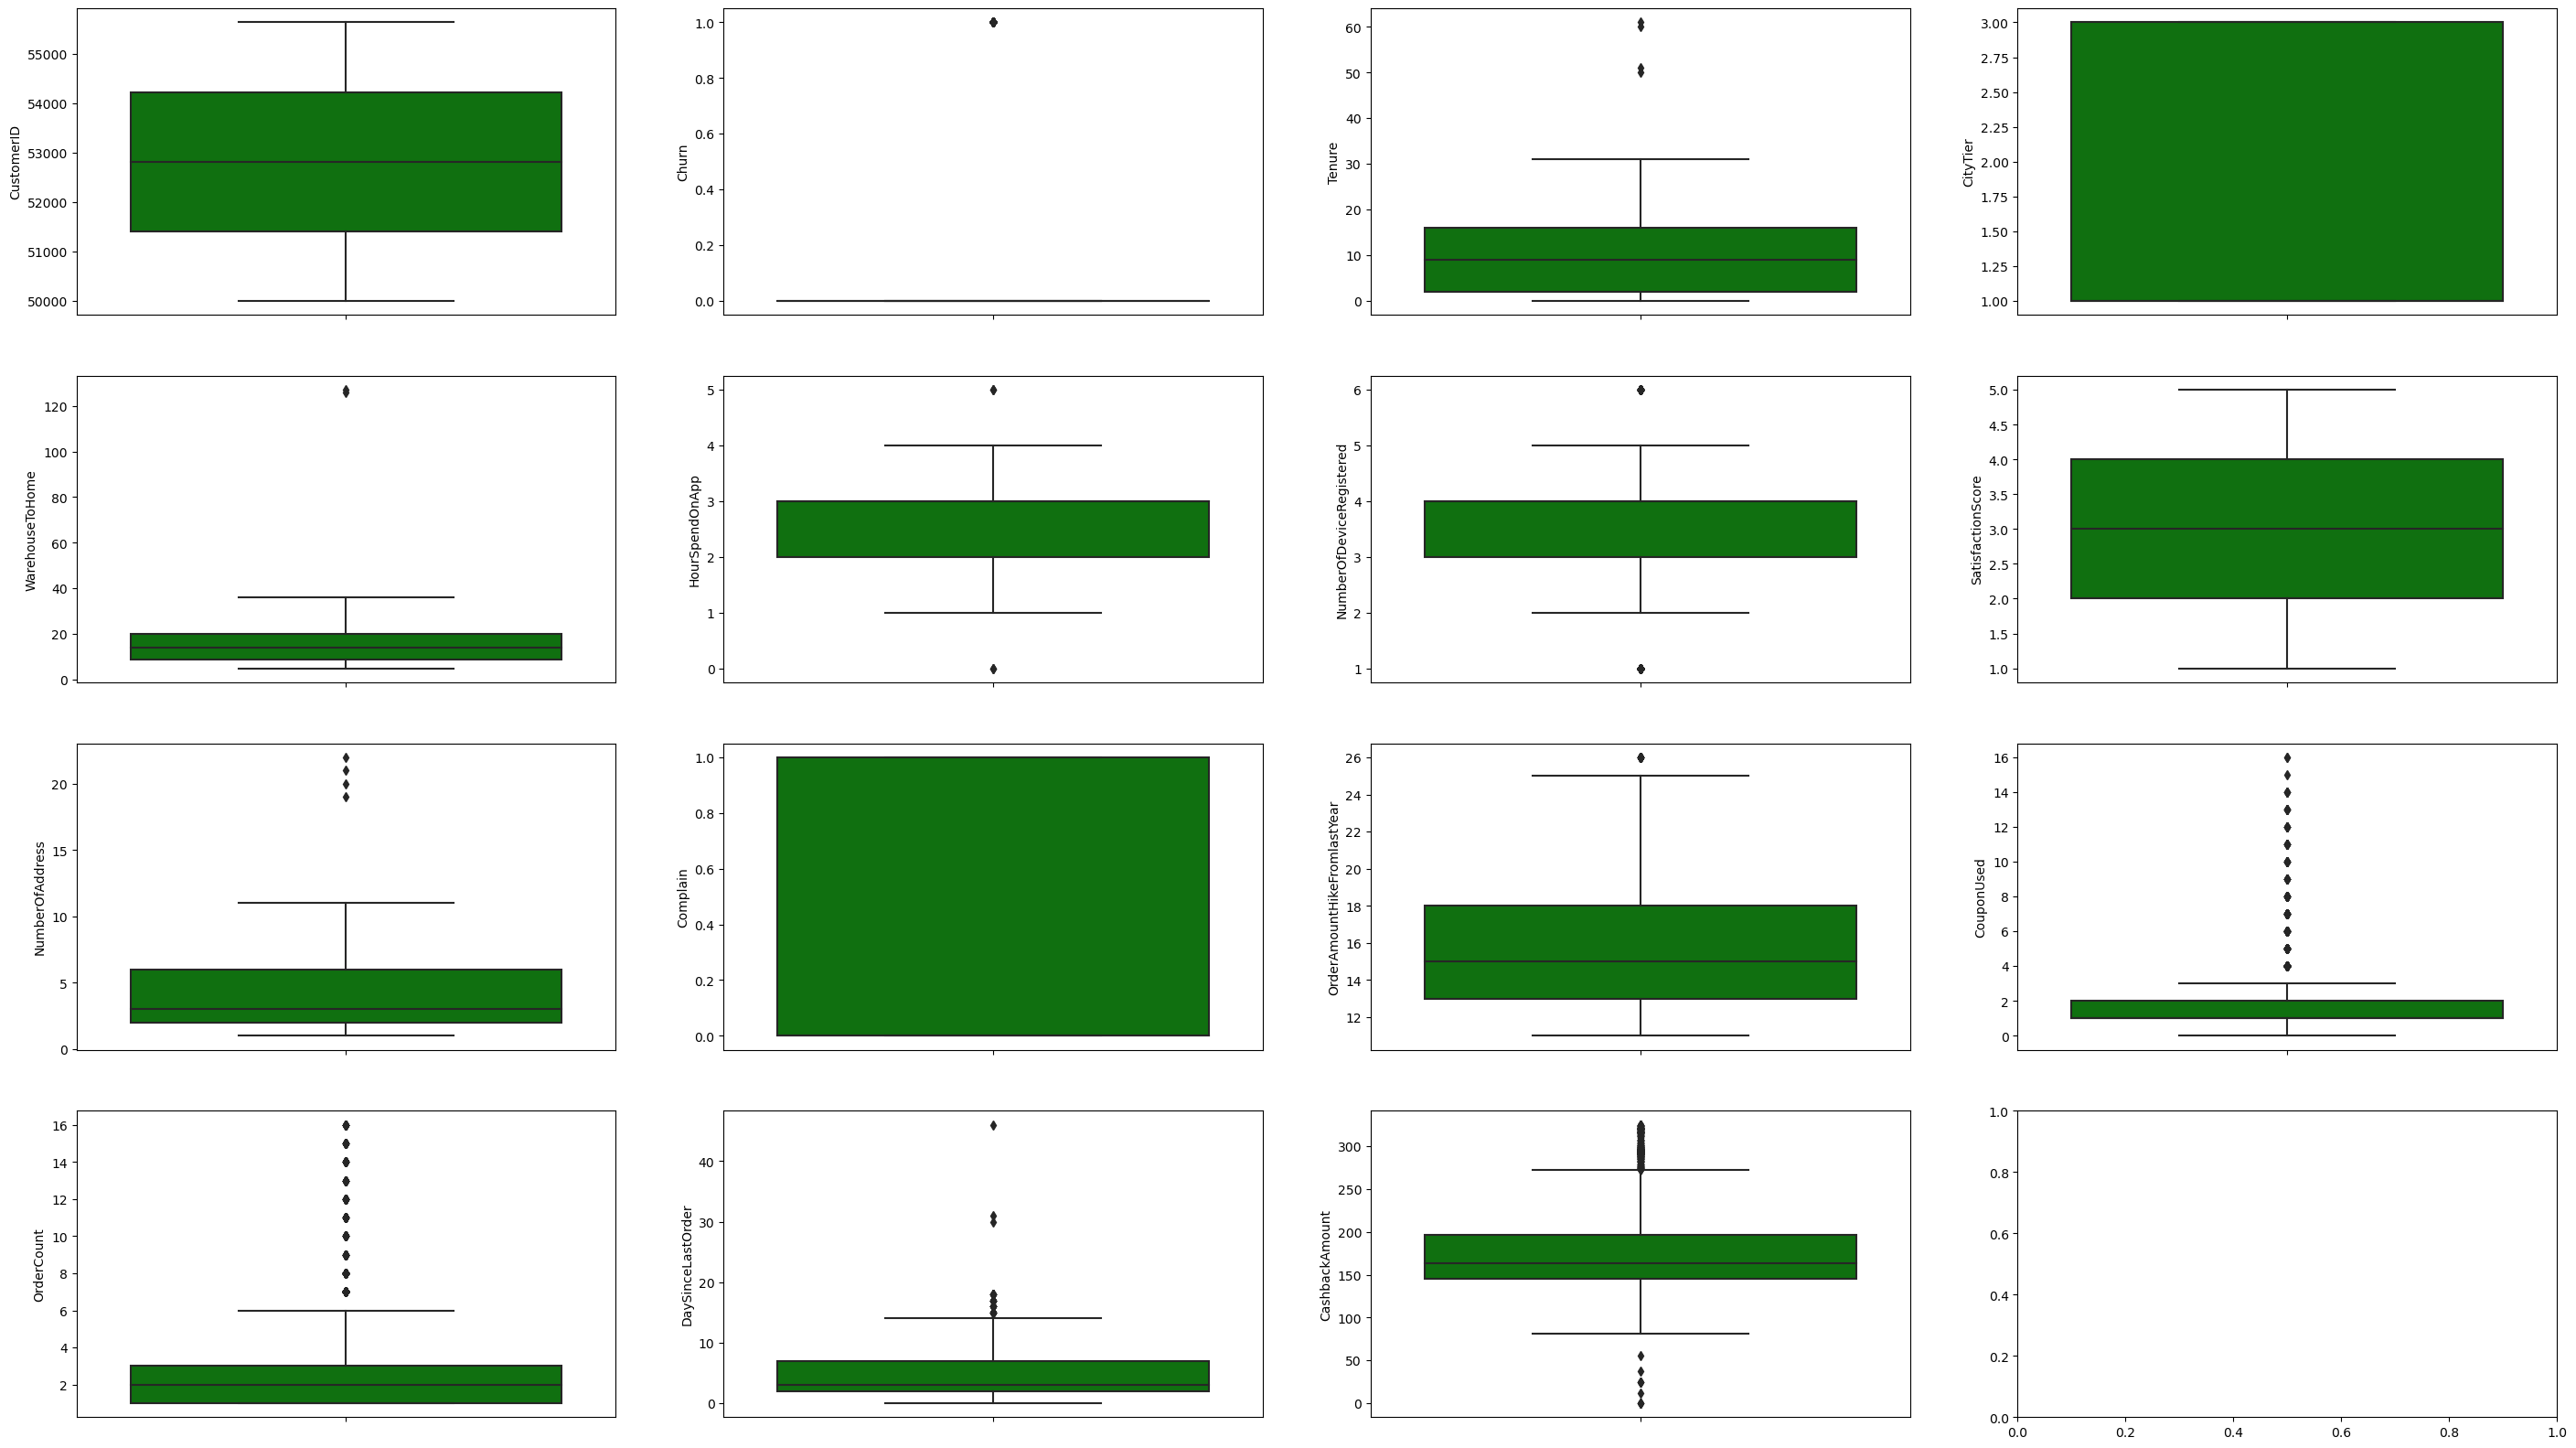

In [22]:
fig, ax = plt.subplots(4, 4, figsize=(35, 20))
for i in range(0, len(nums)):
  plt.subplot(4,4, i+1)
  sns.boxplot(y=df[nums[i]], color='green', orient='v')

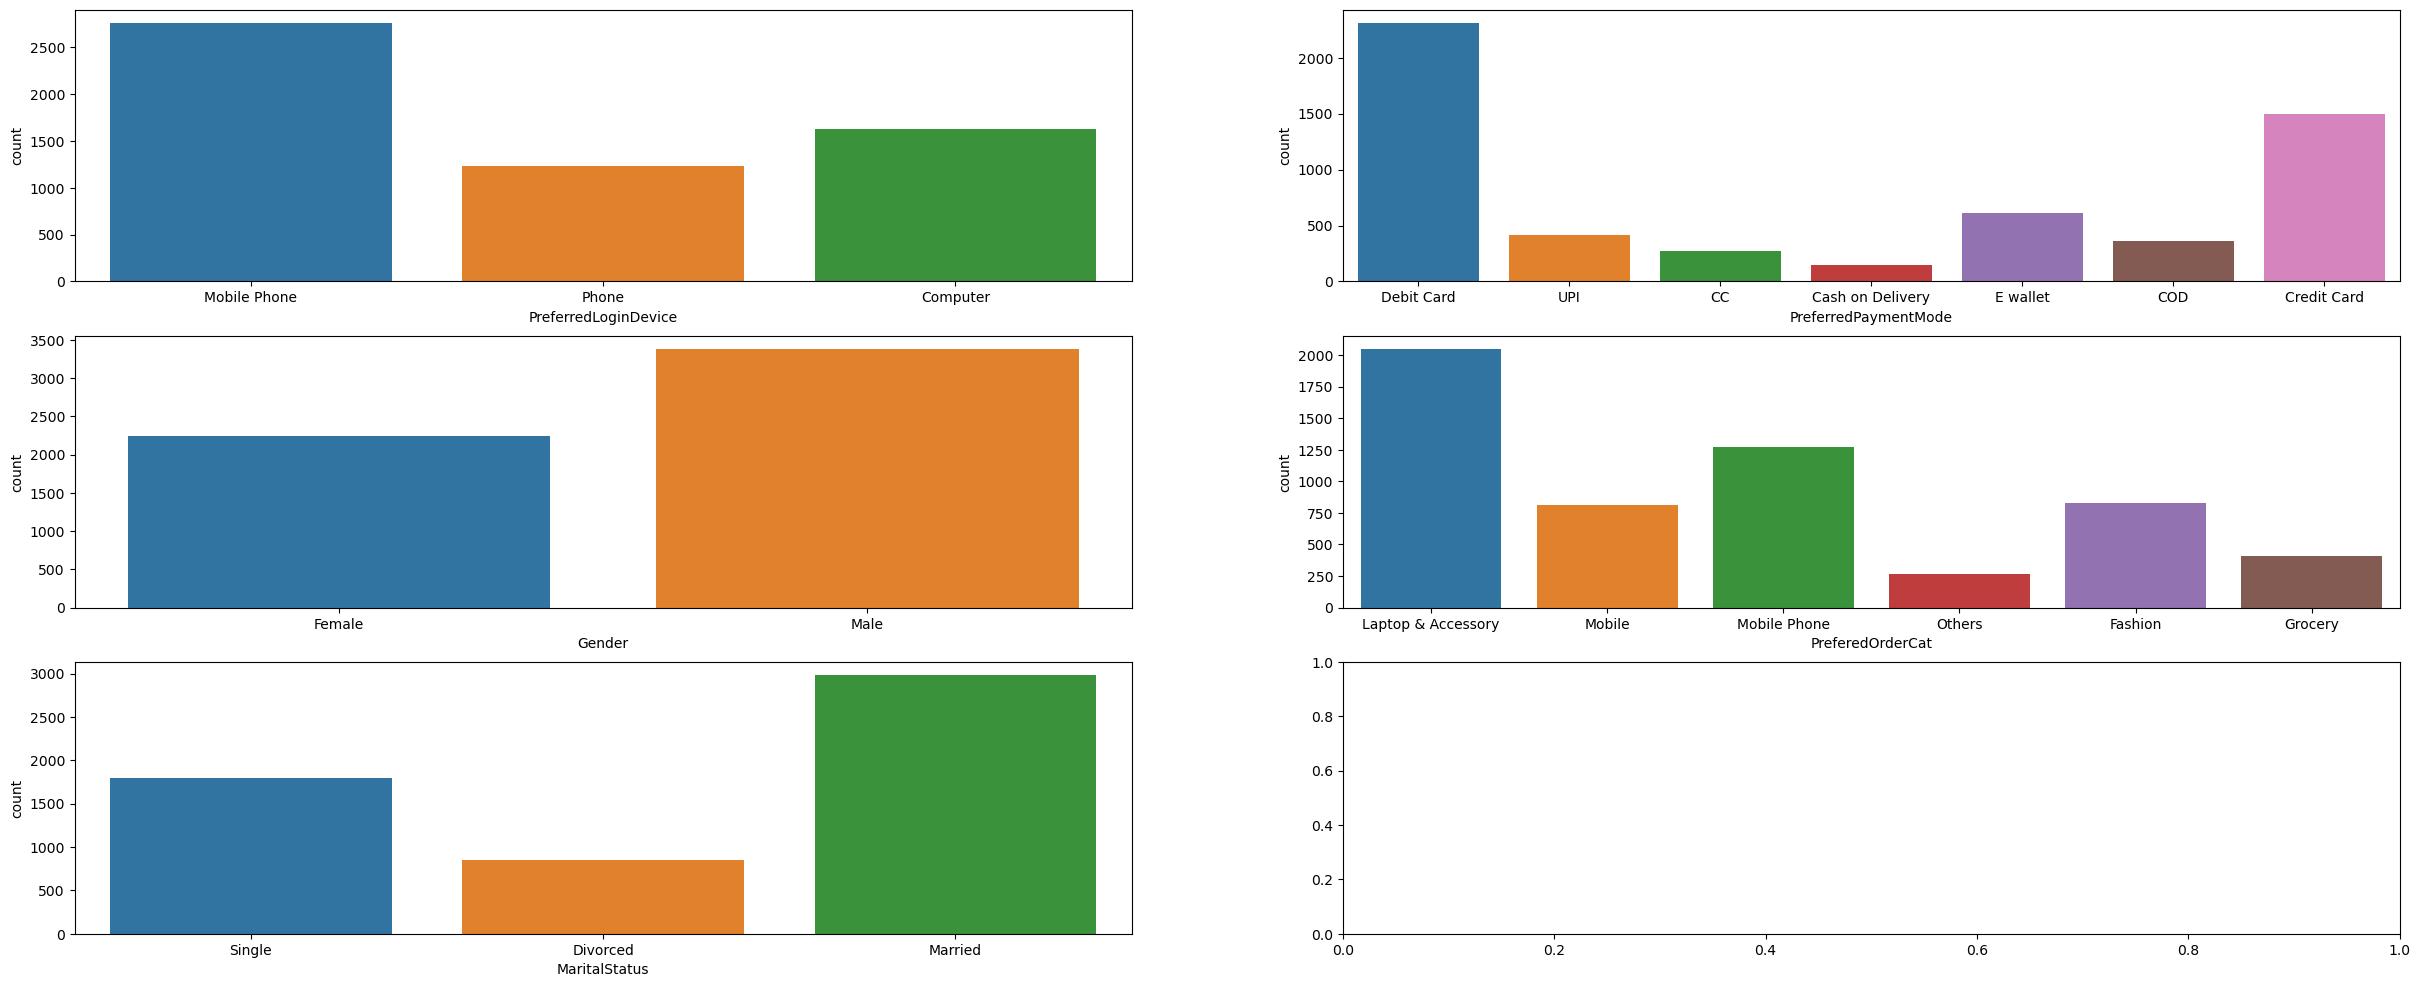

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(30,12))
for col,subplot in zip(cats, ax.flatten())
  sns.countplot(x = df[col], ax=subplot)

# 3. Multivariate Analysis

## 1. Heatmap

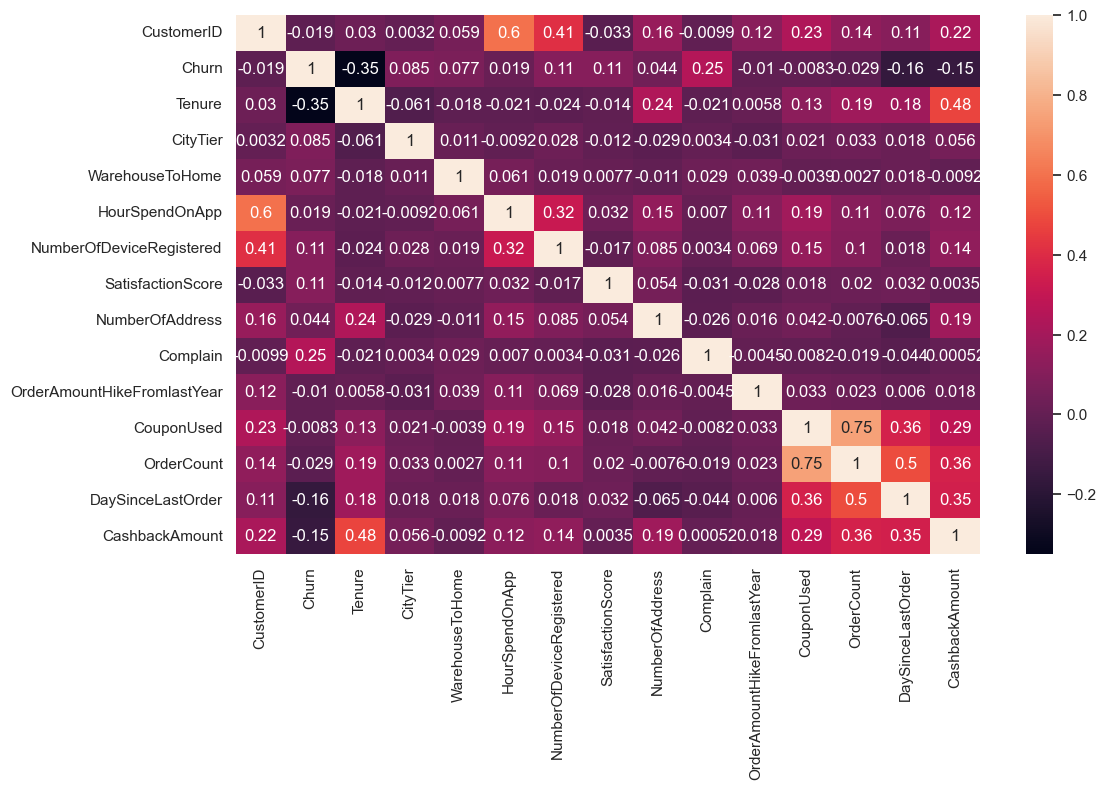

In [ ]:
sns.set(rc={'figure.figsize':(12,7)})
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

Berdasarkan grafik, ditentukan Churn sebagai target. Korelasi feature dengan target Churn paling tinggi adalah feature Tenure dengan nilai korelasi negatif yaitu -0.35. Dengan demikian, semakin rendah nilai Tenure maka semakin tinggi Churn rate.

Korelasi feature dengan target Churn tinggi lainnya adalah feature complain dengan nilai korelasi positif yaitu 0.25. Dengan demikian, semakin tinggi complain rate maka churn rate juga akan semakin tinggi.

Selain itu feature CouponUsed dan feature OrderCount berkorelasi kuat yaitu 0.75, hal ini make sense karena setiap pengguna dengan lebih banyak kupon dapat memesan lebih banyak barang

Terdapat korelasi yang kuat lainnya yaitu feature Tenure dengan feature CashbackAmount yaitu 0.48, hal ini menunjukkan semakin lama customer di ecommerce semakin banyak pula cashbackamount yang diperoleh.

## 2. Analisis 2 Kolom Terhadap Business Metric

### a. Hubungan OrderCount dengan CouponUsed yang Mengalami Churn

<Figure size 2000x2000 with 0 Axes>

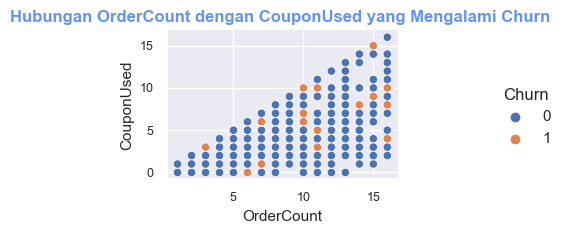

In [25]:
import matplotlib.ticker as mticker
plt.figure(figsize=(20,20))
ax = sns.pairplot(
    df,
    x_vars=["OrderCount"],
    y_vars=["CouponUsed"], diag_kind='kde', hue='Churn' 
)
plt.title('Hubungan OrderCount dengan CouponUsed yang Mengalami Churn ',color='cornflowerblue',fontsize=12,fontweight='bold')
plt.ylabel('CouponUsed', fontsize=11) # y axis label
plt.xlabel('OrderCount', fontsize=11) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 9);

plt.tight_layout()

OrderCount >= 5 dengan CouponUsed >= 10 rentan mengalami Churn

### b. Hubungan CashbackAmount dengan Tenure yang Mengalami Churn

<Figure size 2000x2000 with 0 Axes>

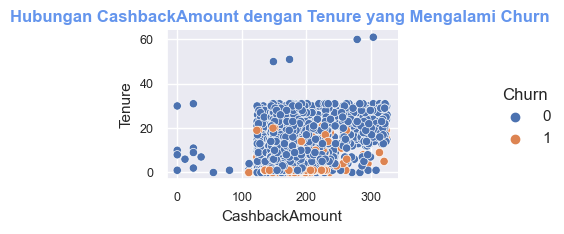

In [26]:
import matplotlib.ticker as mticker
plt.figure(figsize=(20,20))
ax = sns.pairplot(
    df,
    x_vars=["CashbackAmount"],
    y_vars=["Tenure"], diag_kind='kde', hue='Churn' 
)
plt.title('Hubungan CashbackAmount dengan Tenure yang Mengalami Churn ',color='cornflowerblue',fontsize=12,fontweight='bold')
plt.ylabel('Tenure', fontsize=11) # y axis label
plt.xlabel('CashbackAmount', fontsize=11) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 9);

plt.tight_layout()

Pada CashbackAmount 100 hingga 300 dengan Tenure di bawah 20, rentan mengalami churn

### c. Hubungan CashbackAmount dengan DaySinceLastOrder yang Mengalami Churn

<ipython-input-19-5e884342eefe>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 1440x1440 with 0 Axes>

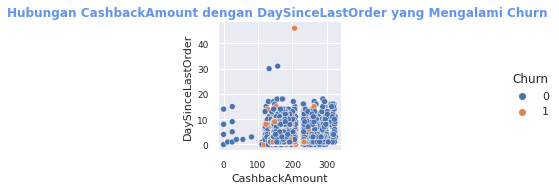

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.pairplot(
    df,
    x_vars=["CashbackAmount"],
    y_vars=["DaySinceLastOrder"], diag_kind='kde', hue='Churn' 
)
plt.title('Hubungan CashbackAmount dengan DaySinceLastOrder yang Mengalami Churn ',color='cornflowerblue',fontsize=12,fontweight='bold')
plt.ylabel('DaySinceLastOrder', fontsize=11) # y axis label
plt.xlabel('CashbackAmount', fontsize=11) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 9);

plt.tight_layout()

Pada CashbackAmount 100 hingga ~200 dengan DaySinceLastOrder dibawah 20 rentan mengalami Churn

### d. Hubungan CashbackAmount dengan PreferedOrderCat yang Mengalami Churn

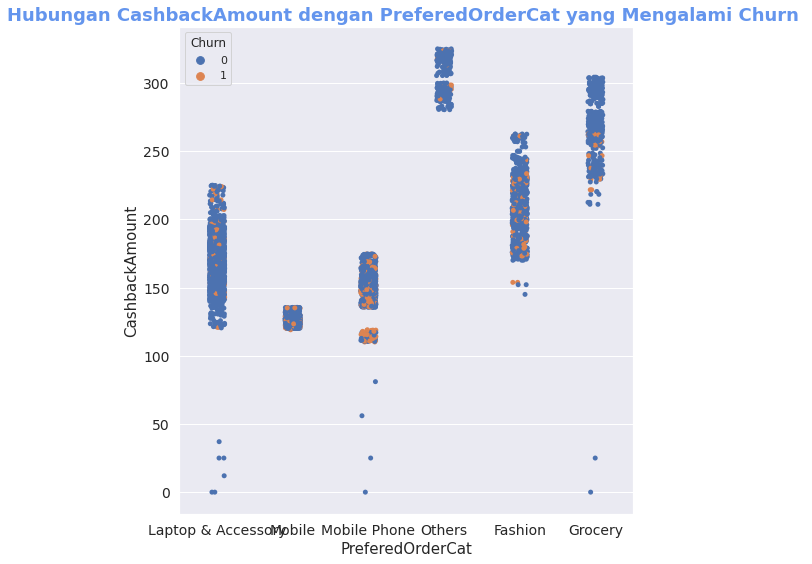

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
ax = sns.stripplot(x='PreferedOrderCat', y='CashbackAmount', hue='Churn', data=df)

plt.title('Hubungan CashbackAmount dengan PreferedOrderCat yang Mengalami Churn ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('CashbackAmount', fontsize=15) # y axis label
plt.xlabel('PreferedOrderCat', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

#ticks_loc = axt.get_yticks()
#axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()

PreferedOrderCat Mobile Phone dengan CashbackAmount ~100-150 lebih banyak mengalami Churn  

### e. Hubungan CityTier dengan SatisfactionScore yang Mengalami Churn

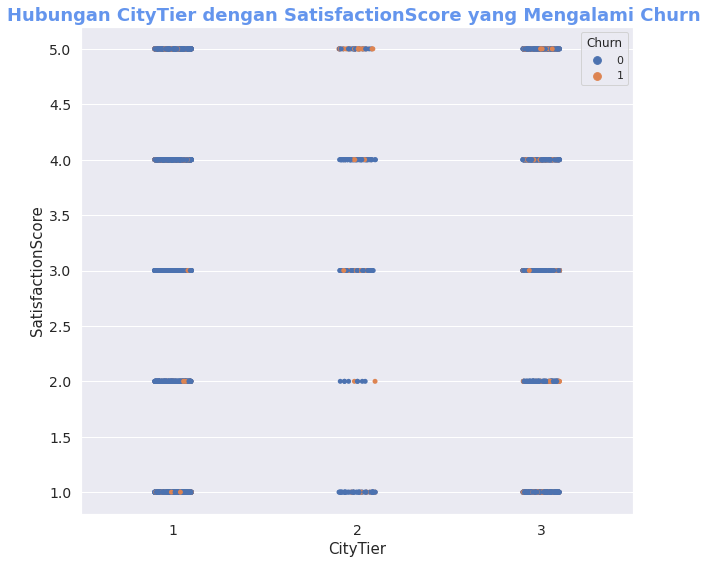

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
ax = sns.stripplot(x='CityTier', y='SatisfactionScore', hue='Churn', data=df)

plt.title('Hubungan CityTier dengan SatisfactionScore yang Mengalami Churn ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('SatisfactionScore', fontsize=15) # y axis label
plt.xlabel('CityTier', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

#ticks_loc = axt.get_yticks()
#axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()

CityTier 2 dengan SatisfactionScore 5 lebih banyak mengalami Churn

### f. Hubungan Complain dengan SatisfactionScore yang Mengalami Churn

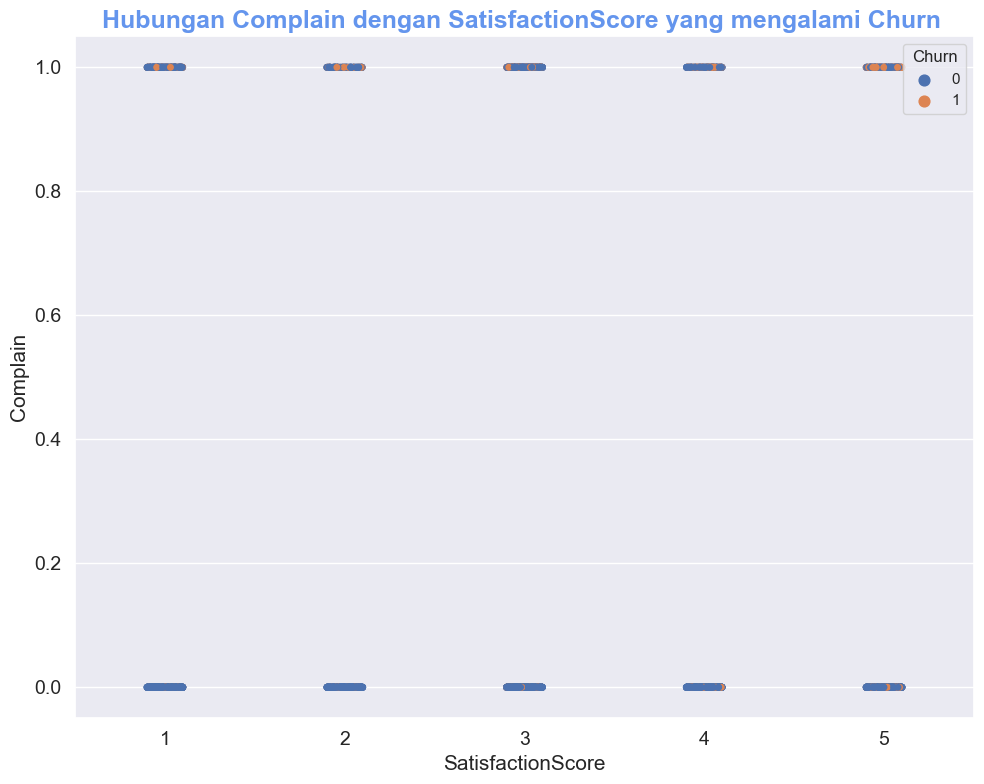

In [27]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
ax = sns.stripplot(x='SatisfactionScore', y='Complain', hue='Churn', data=df)

plt.title('Hubungan Complain dengan SatisfactionScore yang mengalami Churn ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Complain', fontsize=15) # y axis label
plt.xlabel('SatisfactionScore', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

#ticks_loc = axt.get_yticks()
#axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()

Semakin besar nilai SatisfactionScore dengan nilai Complain yang semakin besar, akan mengalami Churn yang lebih banyak pula.

# 4. Business Insight

**Insights**

Berdasarkan plots yang telah dianalisa, dapat diketahui insights berupa:

1. Terdapat tiga fitur yang mempengaruhi kuat churn rate, yaitu Tenure, CashbackAmount dan Complain.
2. *Laptop & Accessory* merupakan kategori dengan pencarian terbanyak oleh para customer.
3. Banyak terjadinya churn di kategori *Mobile Phone*, meskipun dengan adanya promo cashback.
4. Adanya churn pada feedback *SatisfactionScore* yang disertai complain, meskipun score nya sudah baik.
5. Semakin banyak OrderCount customer dengan coupon yang digunakan, semakin rentan untuk terjadi churn.

**Rekomendasi bisnis**

Berdasarkan insight-insight diatas, untuk mengurangi churn, perusahaan dapat melakukan hal-hal berikut: 

1. Melakukan engagement untuk menarik kembali customer sudah lama tidak aktif.
2. Pengadaan promo cashback yang lebih banyak lagi, sehingga dapat menarik engagement dari para customer.
3. Memberikan rekomendasi produk sesuai kategori yang terpopuler berdasarkan minat customer sebelumnya, sehingga dapat menarik minat customer untuk melakukan pembelian.
4. Menyediakan platform saluran complain/feedback yang lebih terintegrasi dan mudah dibaca oleh perusahaan.
5. Memberikan coupon/voucher untuk mengatasi complain.
6. Meninjau dan menyesuaikan kembali coupon yang diberikan pada customer yang memiliki jumlah order banyak agar dapat memenuhi kepuasan customer.